# TASK #1: PROBLEM STATEMENT/GOAL



- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

# TASK #2: IMPORT DATASET AND LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile


In [7]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [8]:
# Let's explore the 3 dataframes
# "stores" dataframe contains information related to the 45 stores such as type and size of store.

stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [9]:
# Let's explore the "feature" dataframe
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not

feature

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [10]:
# Let's explore the "sales" dataframe
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

sales

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

# TASK #3: EXPLORE INDIVIDUAL DATASET

- What is the maximum fuel price? and maximum unemployment numbers?
- What is the average size of the stores?


In [11]:
#Number of records present
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [12]:
# Average Size of stores for each type
round(stores.groupby('Type')['Size'].mean(),2)

Type
A    177247.73
B    101190.71
C     40541.67
Name: Size, dtype: float64

In [13]:
stores.groupby('Type').max()

Store    Size
Type               
A        41  219622
B        45  140167
C        44   42988

In [14]:
stores.groupby('Type').min()

Store   Size
Type              
A         1  39690
B         3  34875
C        30  39690

From above we can see that size of store is completely independent of store type.

In [15]:
stores.corr()

Store     Size
Store  1.00000 -0.24427
Size  -0.24427  1.00000

In [16]:
# Change the datatype of 'date' column

feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [17]:
feature.head(5)

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-05-03        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [18]:
sales.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False

# TASK #4: MERGE DATASET INTO ONE DATAFRAME

In [19]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])


In [20]:
df.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     2 2010-05-02      50605.27      False        42.31       2.572   
2      1     3 2010-05-02      13740.12      False        42.31       2.572   
3      1     4 2010-05-02      39954.04      False        42.31       2.572   
4      1     5 2010-05-02      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

In [21]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')


In [22]:
df.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     2 2010-05-02      50605.27      False        42.31       2.572   
2      1     3 2010-05-02      13740.12      False        42.31       2.572   
3      1     4 2010-05-02      39954.04      False        42.31       2.572   
4      1     5 2010-05-02      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [23]:
#Exract Month
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [24]:
df.head(2)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     2 2010-05-02      50605.27      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  month  year  
0         8.106    A  151315      5  2010  
1         8.106    A  151315      5  2010

# TASK #5: EXPLORE MERGED DATASET

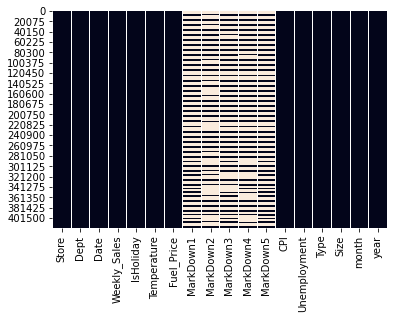

In [25]:
sns.heatmap(df.isnull(), cbar = False)

In [26]:
# check the number of non-null values in the dataframe
df.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
year                 0
dtype: int64

In [27]:
# Fill up NaN elements with zeros
df = df.fillna(0)


In [28]:
df.head(1)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02       24924.5      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size  month  year  
0         8.106    A  151315      5  2010

In [29]:
# Statistical summary of the combined dataframe
df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        3.361027    2590.074819     879.974298     468.087665   
std         0.458515    6052.385934    5084.538801    5528.873453   
min         2.472000       0.000000    -265.760000     -29.100000   
25%         2.933000       0.000000       0.000000       0.000000   
50%         3.452000       0.000000       0.000000       0.000000   
75%         3.738000    2809.050000       2.200000       4.540000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean     1083.132268    1662.772385     171.201947       7.960289   
std      3894.529945    4207.629321      39.159276       1.863296   
min         0.000000       0.000000     126.064000       3.879000   
25%         0.000000       0.000000     132.022667       6.891000   
50%         0.000000       0.000000     182.318780       7.866000   
75%       425.290000    2168.040000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size          month           year  
count  421570.000000  421570.000000  421570.000000  
mean   136727.915739       6.478580    2010.968591  
std     60980.583328       3.324757       0.796876  
min     34875.000000       1.000000    2010.000000  
25%     93638.000000       4.000000    2010.000000  
50%    140167.000000       6.000000    2011.000000  
75%    202505.000000       9.000000    2012.000000  
max    219622.000000      12.000000    2012.000000

In [30]:
# check the number of duplicated entries in the dataframe
df.duplicated().sum()


0

In [31]:
#Replace the "IsHoliday" with ones and zeros instead of True and False (characters with numbers)
df['IsHoliday'] = df['IsHoliday'].replace({True: 1, False: 0})

In [32]:
df.head(2)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50          0        42.31       2.572   
1      1     2 2010-05-02      50605.27          0        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size  month  year  
0         8.106    A  151315      5  2010  
1         8.106    A  151315      5  2010

# TASK #6: PERFORM EXPLORATORY DATA ANALYSIS

In [33]:
corr_matrix = df.drop(columns = ['Store']).corr()

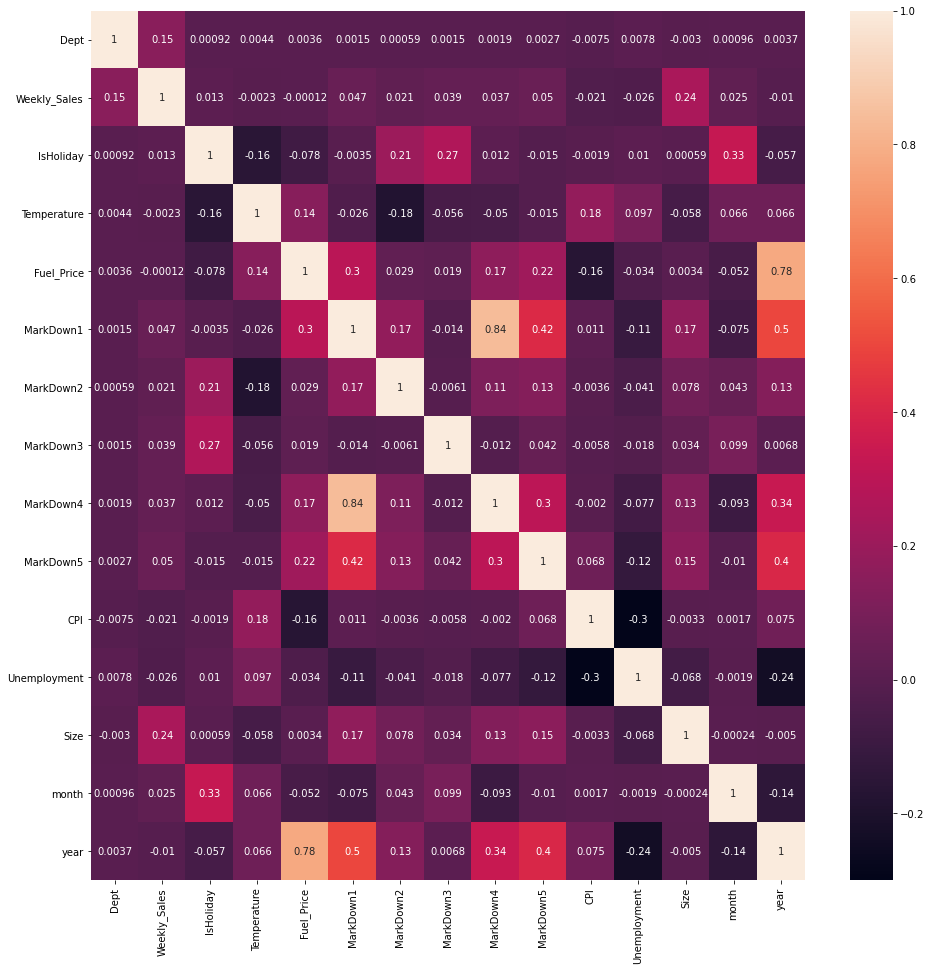

In [75]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #7: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CD3BD37C0>,
      dtype=object)

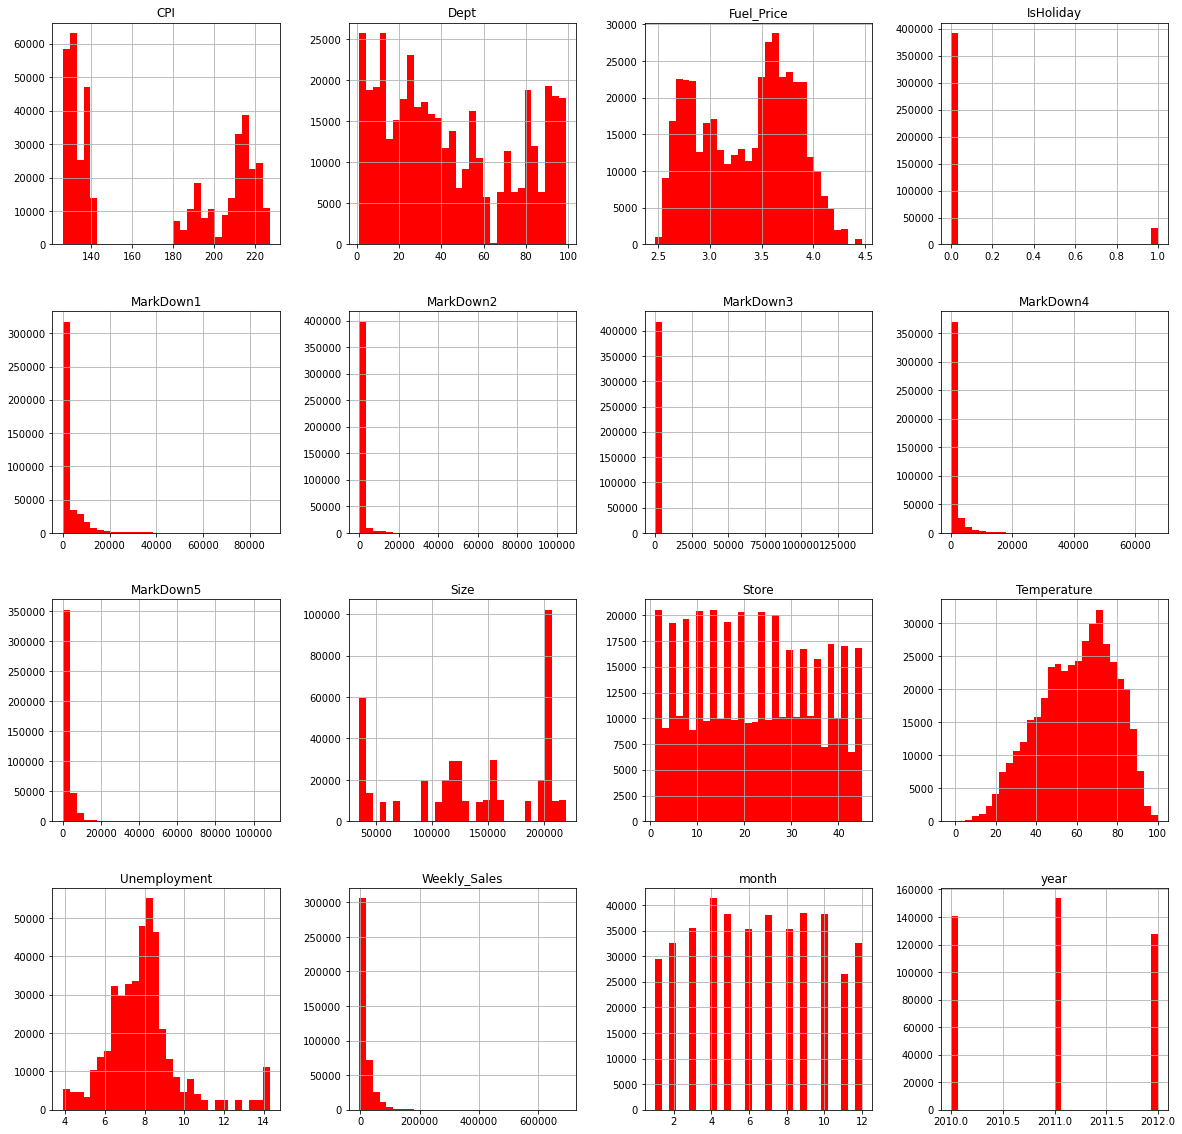

In [76]:
df.hist(bins = 30, figsize = (20,20), color = 'r')


D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


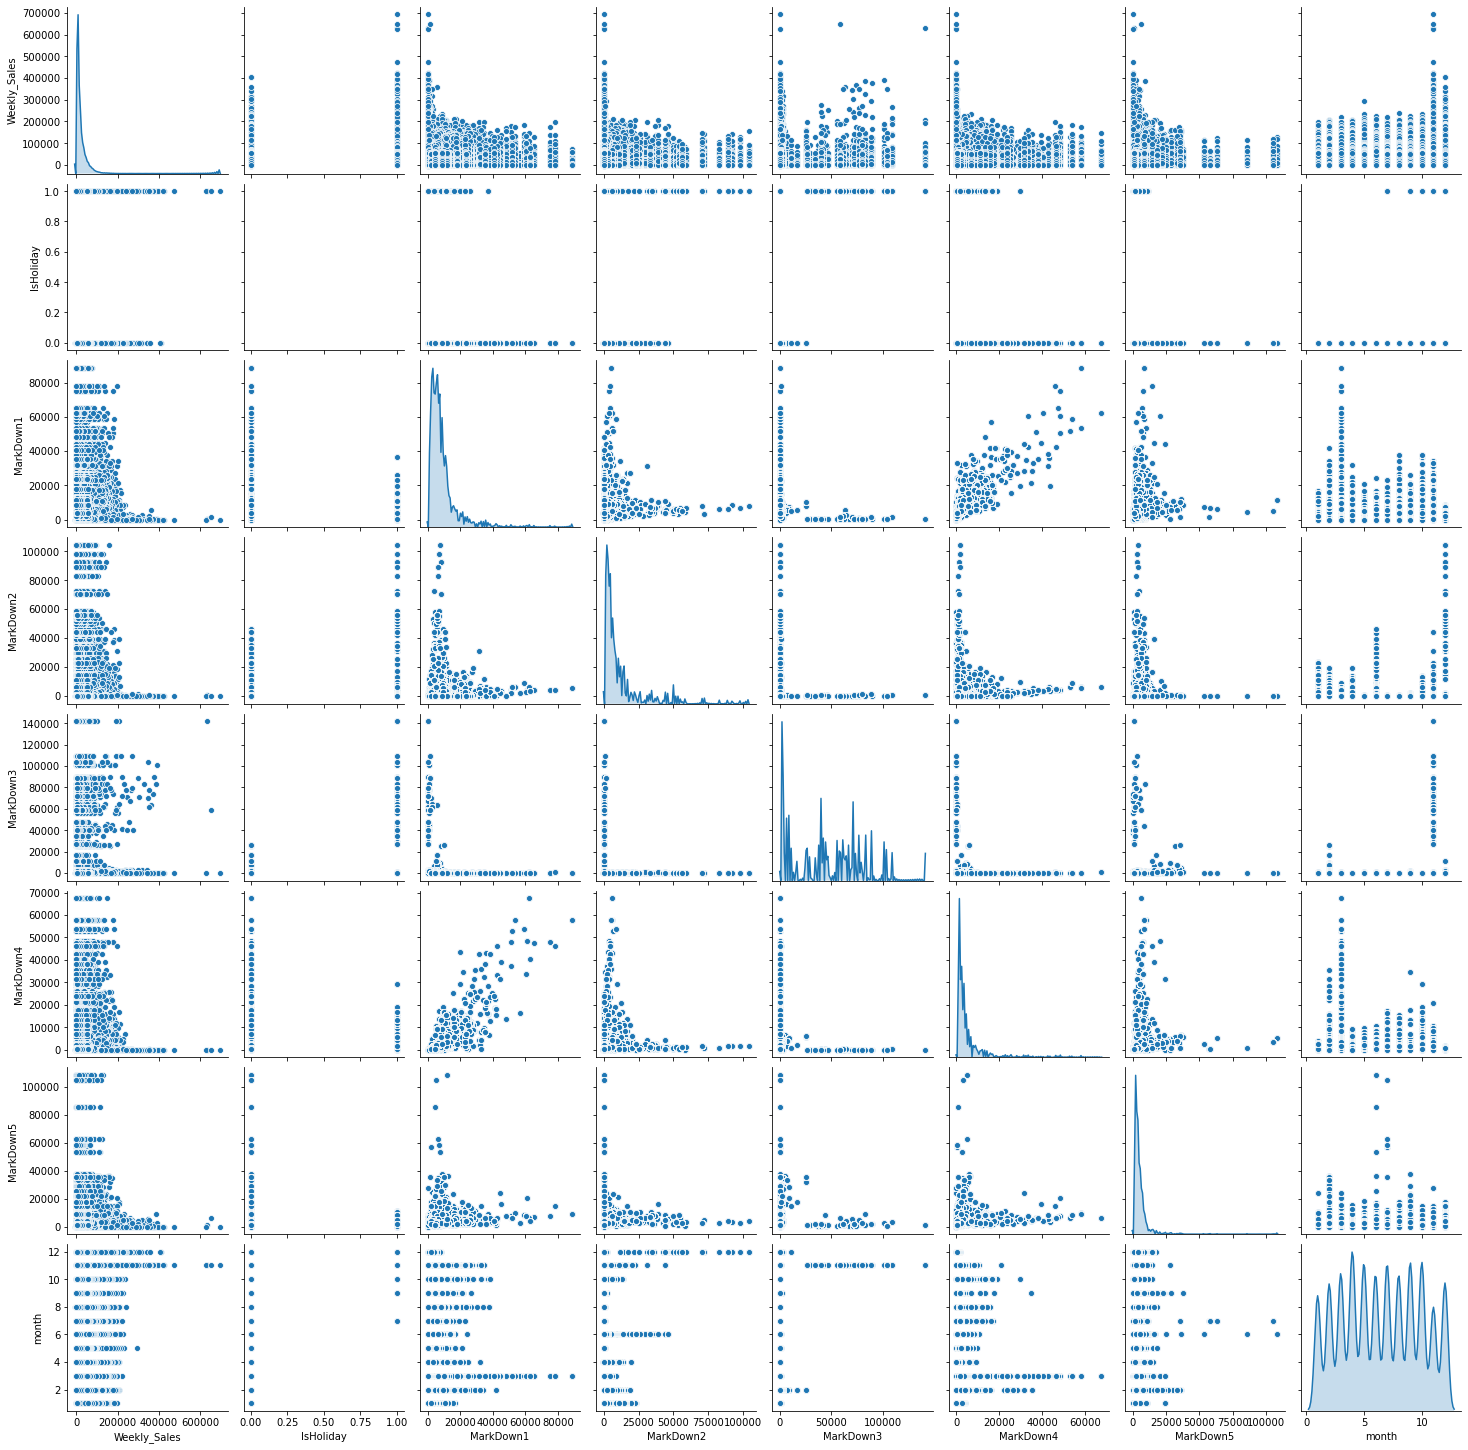

In [77]:
# visualizing the relationship using pairplots
# there is a relationship between markdown #1 and Markdown #4
# holiday and sales 
# Weekly sales and markdown #3
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","month"]], diag_kind = "kde")

In [36]:
df_type = df.groupby('Type').mean()

In [37]:
df_type

Store       Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Type                                                                           
A     21.736419  44.622156  20099.568043   0.070471    60.531945    3.343999   
B     18.450417  43.112273  12237.075977   0.070412    57.562951    3.382523   
C     38.942015  46.836350   9519.532538   0.069582    67.554266    3.364654   

        MarkDown1    MarkDown2   MarkDown3    MarkDown4    MarkDown5  \
Type                                                                   
A     3102.403194  1083.216159  549.644930  1325.891281  2147.830168   
B     2553.465968   827.500452  481.215226  1043.927675  1324.921913   
C      138.960203    53.274338    5.142226     5.603993   505.826631   

             CPI  Unemployment           Size     month         year  
Type                                                                  
A     174.408895      7.791595  182231.285486  6.480030  2010.966683  
B     167.176656      7.928836  101818.735827  6.478100  2010.967858  
C     170.429314      8.934350   40535.725286  6.473085  2010.981055

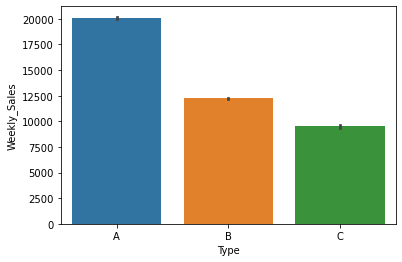

In [38]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

Text(0, 0.5, 'Sales')

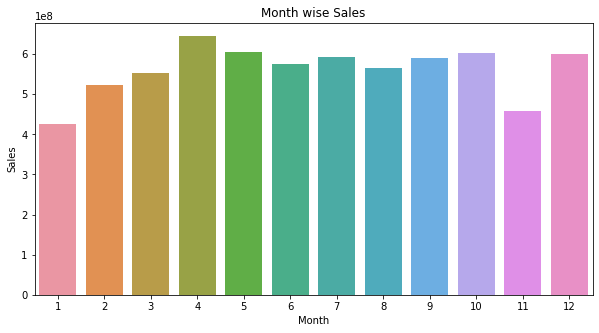

In [74]:
df_temp = df.groupby(df.Date.apply(lambda x: x.month)).sum()['Weekly_Sales'].reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=df_temp.Date,y=df_temp.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

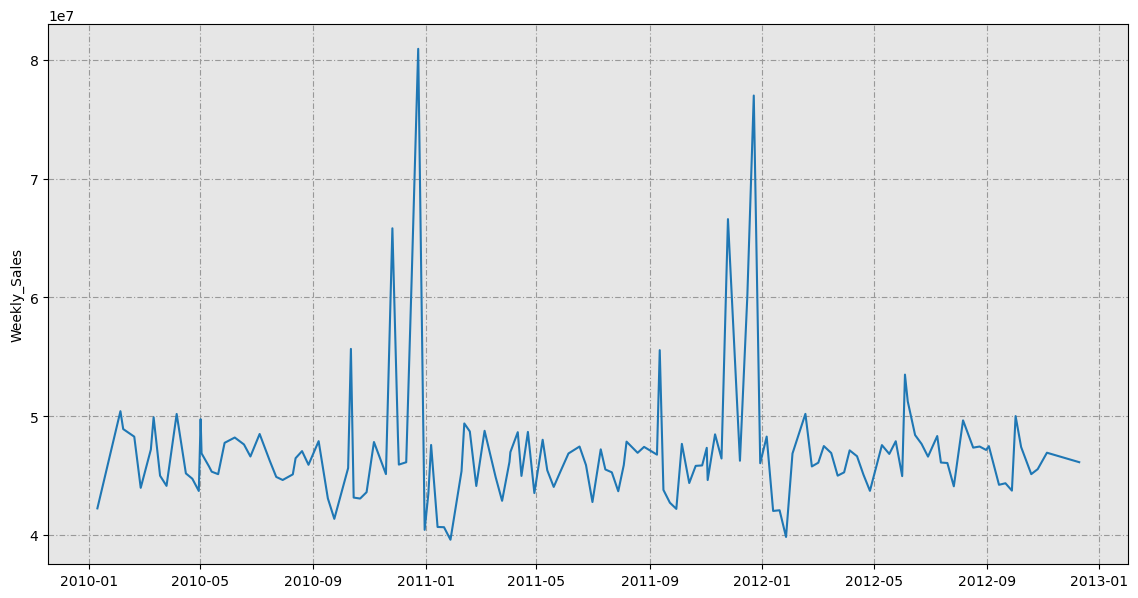

In [75]:
df2=df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
f_1 = plt.figure(figsize=(12,6), dpi=100)
ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_ylabel('Weekly_Sales')
ax_1.plot(df2['Date'], df2['Weekly_Sales'])
ax_1.grid(True, color='0.6', dashes=(5,2,1,2))
ax_1.set_facecolor((0.9, 0.9, 0.9))

Looks like from october to december the sales went up which we can tell that there could be event or sale on product at that point of time. As they mention holiday days lets check on that

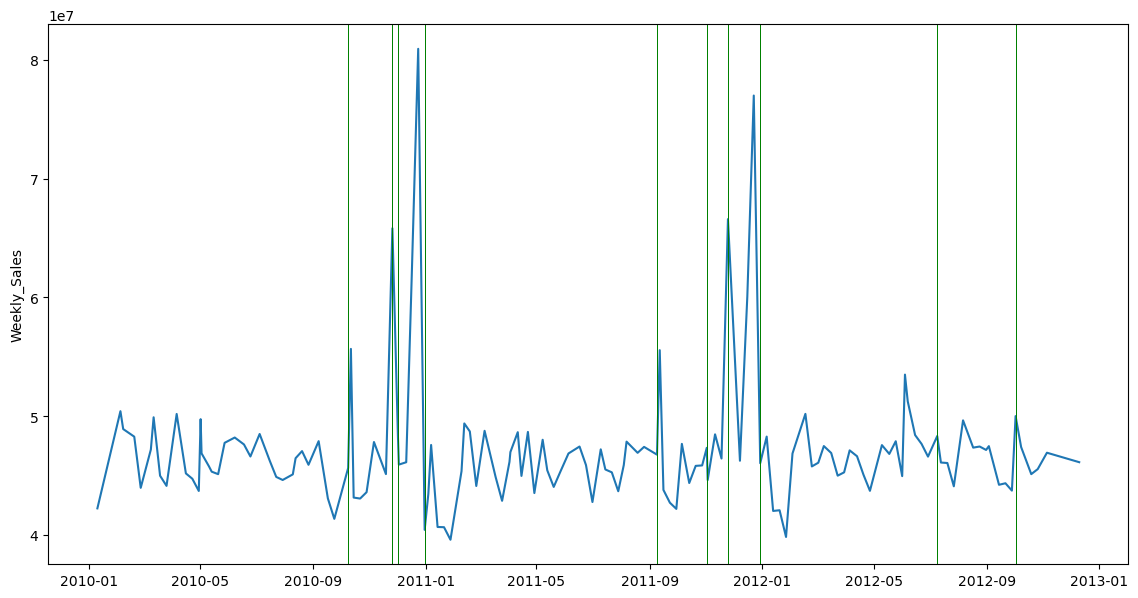

In [77]:
df2=df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
f_1 = plt.figure(figsize=(12,6), dpi=100)
ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_ylabel('Weekly_Sales')
ax_1.plot(df2['Date'], df2['Weekly_Sales'])

for x in df[df['IsHoliday']==1]['Date']:
    ax_1.axvline(x=x, color='g', linewidth=0.5)

we can see that in holidays there are peaks so we can say that people are more likely to go to stores on holidays or events that creates that holiday

In [83]:
# !pip install plotly

# from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=1, 
                    cols=1)

custom_aggregation = {}
custom_aggregation["CPI"] = "mean"
data2 = df.set_index(pd.DatetimeIndex(df['Date']))

data0 = data2.resample('M').agg(custom_aggregation)
data0.columns = ["CPI"]
data0['Date'] = data0.index

x = data0['Date'].tolist()
y = data0['CPI'].tolist()
y_ = data0['CPI'].interpolate().tolist()

fig.add_trace(go.Scatter(x=x, y=y,name='CPI'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=y_,mode='markers',name='Interpolate CPI'), 1, 1)

fig['layout'].update(height=500, width=900, title='Monthly Consumer Price Index (Average)')
fig.show()

In [39]:
# df_dept = df.drop(columns = ['Store','Type','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Size','month'])
df_dept = df.groupby('Dept').mean()
df_dept

Store  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Dept                                                                
1     23.000000  19213.485088   0.069930    60.663782    3.358607   
2     23.000000  43607.020113   0.069930    60.663782    3.358607   
3     23.000000  11793.698516   0.069930    60.663782    3.358607   
4     23.000000  25974.630238   0.069930    60.663782    3.358607   
5     22.757366  21365.583515   0.069797    60.559367    3.365397   
...         ...           ...        ...          ...         ...   
95    23.000000  69824.423080   0.069930    60.663782    3.358607   
96    23.258138  15210.942761   0.069839    61.539285    3.359920   
97    23.357439  14255.576919   0.069767    60.490781    3.362418   
98    24.173920   6824.694889   0.071967    60.115942    3.372656   
99    21.438515    415.487065   0.110209    62.813596    3.592702   

        MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5  \
Dept                                                                    
1     2429.019322   818.872810   429.184037  1008.870435  1581.806813   
2     2429.019322   818.872810   429.184037  1008.870435  1581.806813   
3     2429.019322   818.872810   429.184037  1008.870435  1581.806813   
4     2429.019322   818.872810   429.184037  1008.870435  1581.806813   
5     2462.697233   830.226332   435.134596  1022.858240  1603.738276   
...           ...          ...          ...          ...          ...   
95    2429.019322   818.872810   429.184037  1008.870435  1581.806813   
96    2362.845647   820.762363   397.214137   999.452087  1660.599345   
97    2463.638764   833.096524   432.439341  1025.957821  1591.276367   
98    2569.994716   882.483088   467.655716  1074.883525  1678.390840   
99    7741.403376  2164.573063  1734.841903  3897.476369  4526.868643   

             CPI  Unemployment           Size     month         year  
Dept                                                                  
1     171.578394      7.999151  130287.600000  6.475524  2010.965035  
2     171.578394      7.999151  130287.600000  6.475524  2010.965035  
3     171.578394      7.999151  130287.600000  6.475524  2010.965035  
4     171.578394      7.999151  130287.600000  6.475524  2010.965035  
5     171.109374      7.978057  131530.357964  6.479439  2010.974791  
...          ...           ...            ...       ...          ...  
95    171.578394      7.999151  130287.600000  6.475524  2010.965035  
96    171.562686      7.849295  129282.010507  6.482489  2010.998970  
97    170.445933      8.043564  130676.377190  6.477700  2010.966231  
98    169.196443      8.111493  135266.091501  6.495716  2010.985264  
99    179.263692      7.428856  186622.052204  7.088167  2011.570766  

[81 rows x 15 columns]

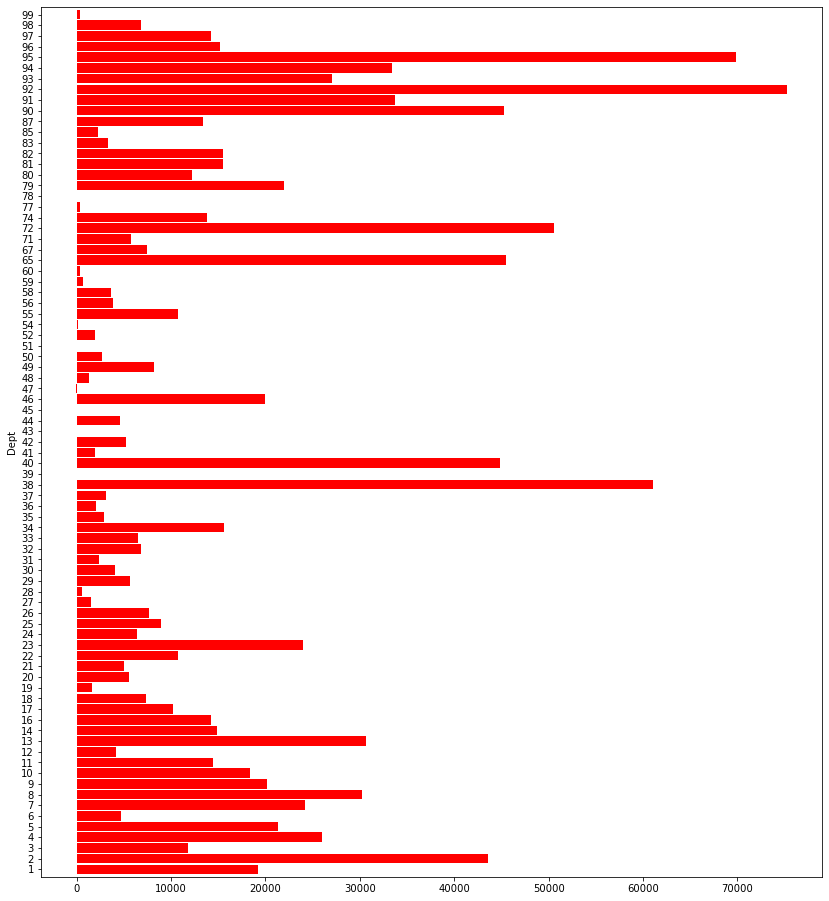

In [40]:
fig = plt.figure(figsize = (14,16))
df_dept['Weekly_Sales'].plot(kind = 'barh', color = 'r', width = 0.9)

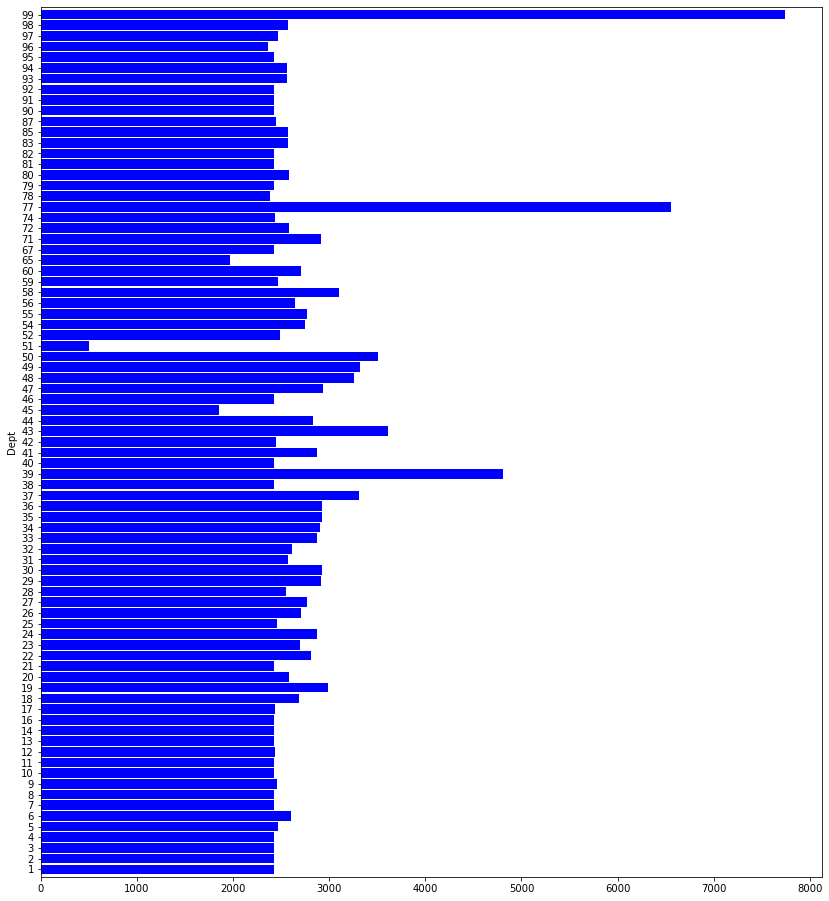

In [41]:
fig = plt.figure(figsize = (14,16))
df_dept['MarkDown1'].plot(kind = 'barh', color = 'blue', width = 0.9)

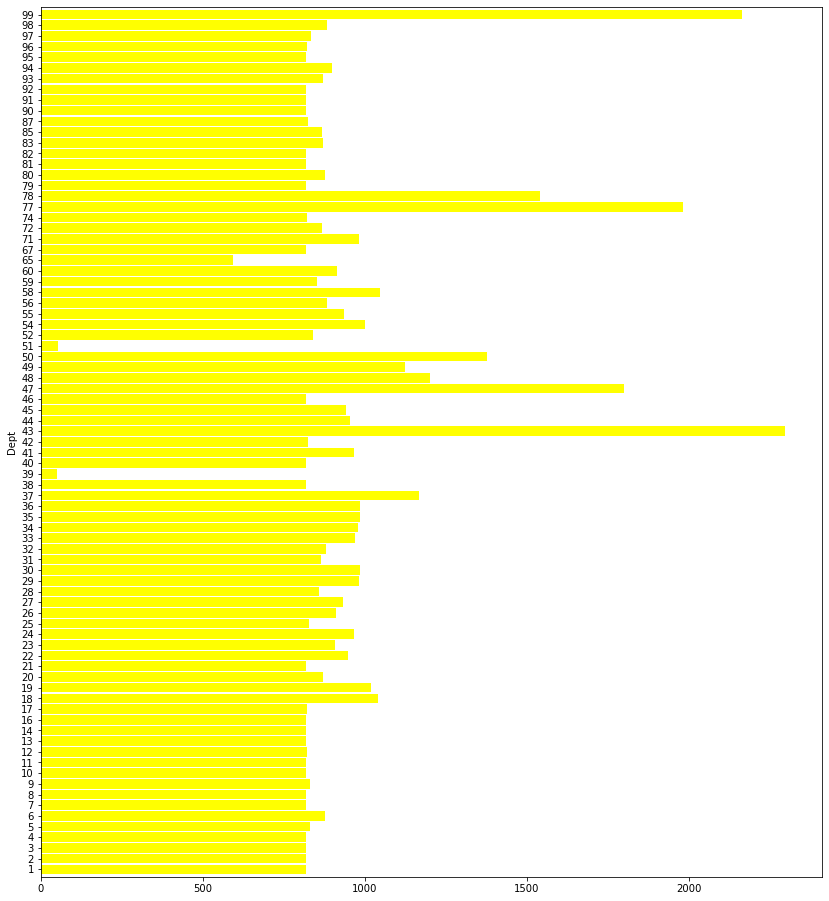

In [42]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown2'].plot(kind = 'barh', color = 'yellow', width = 0.9)

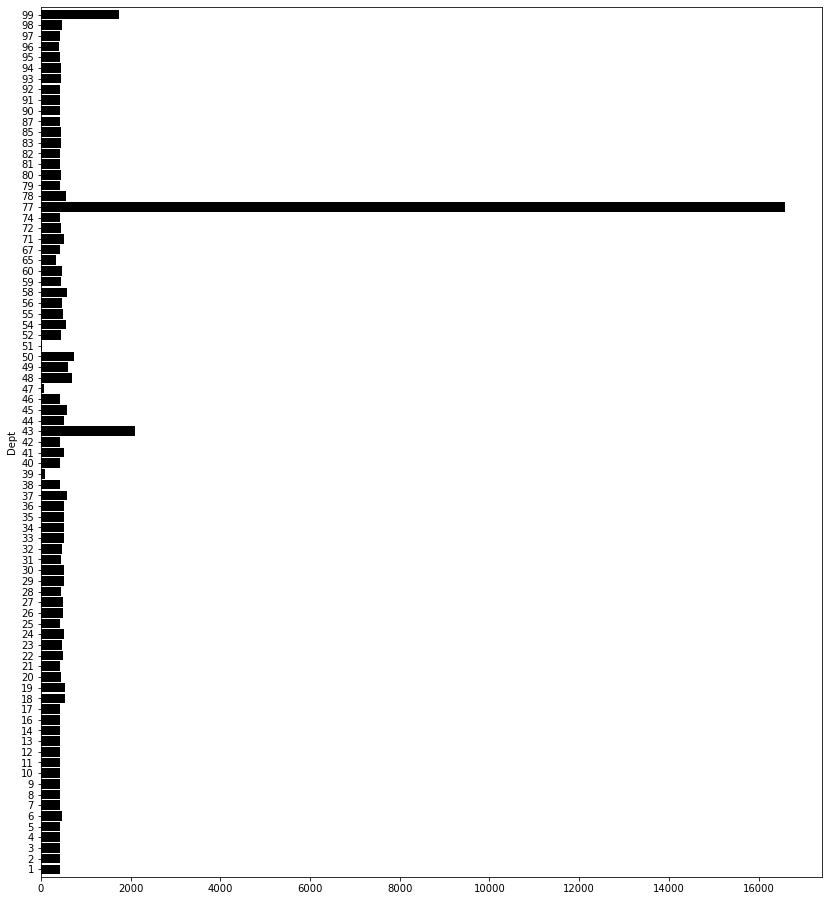

In [43]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown3'].plot(kind = 'barh', color = 'black', width = 0.9)

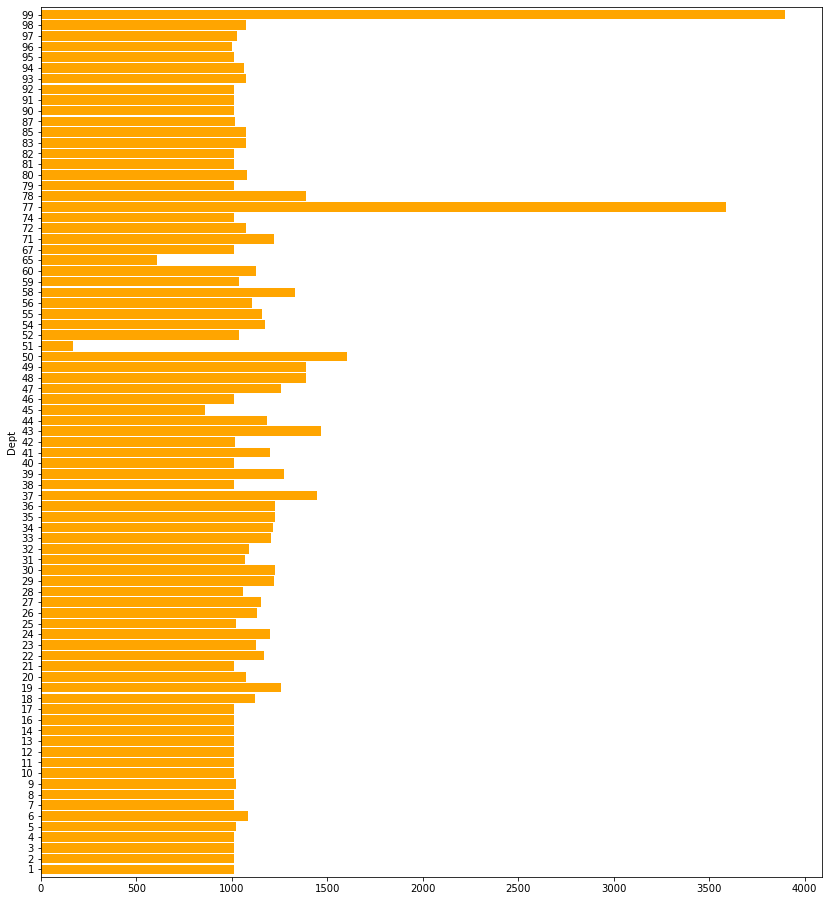

In [44]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown4'].plot(kind = 'barh', color = 'orange', width = 0.9)

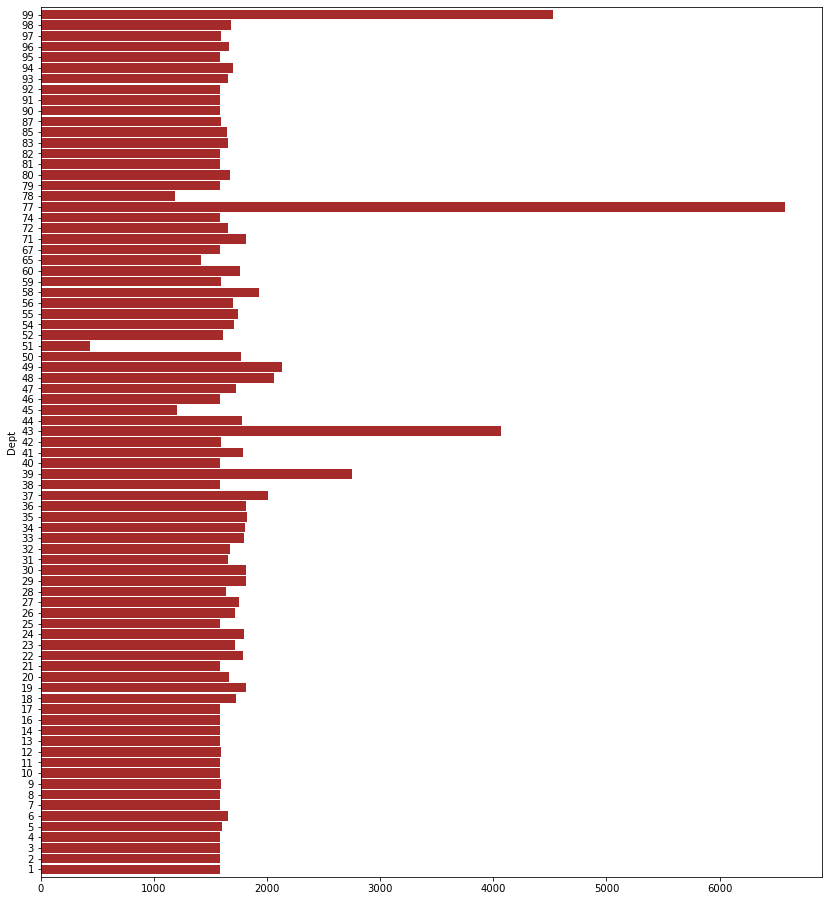

In [45]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown5'].plot(kind = 'barh', color = 'brown', width = 0.9)

- We can conclude that departments that have poor weekly sales have been assigned high number of markdowns. Let's explore this in more details
- Example: check out store 77 and 99 

In [46]:
# Sort by weekly sales
df_dept_sale = df_dept.sort_values(by = ['Weekly_Sales'], ascending = True)
df_dept_sale['Weekly_Sales'][:30]

Dept
47      -7.682554
43       1.193333
78       7.296638
39      11.123750
51      21.931729
45      23.211586
54     108.305985
77     328.961800
60     347.370229
99     415.487065
28     618.085116
59     694.463564
48    1344.893576
27    1583.437727
19    1654.815030
52    1928.356252
41    1965.559998
36    2022.571061
85    2264.359407
31    2339.440287
50    2658.897010
35    2921.044946
37    3111.076193
83    3383.349838
58    3702.907419
56    3833.706211
30    4118.197208
12    4175.397021
44    4651.729658
6     4747.856188
Name: Weekly_Sales, dtype: float64

# TASK #8: PREPARE THE DATA BEFORE TRAINING

In [47]:
# Drop the date
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])


In [48]:
df_final.head(5)

Store  Dept  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1     1          0        42.31       2.572        0.0        0.0   
1      1     2          0        42.31       2.572        0.0        0.0   
2      1     3          0        42.31       2.572        0.0        0.0   
3      1     4          0        42.31       2.572        0.0        0.0   
4      1     5          0        42.31       2.572        0.0        0.0   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment Type    Size  \
0        0.0        0.0        0.0  211.096358         8.106    A  151315   
1        0.0        0.0        0.0  211.096358         8.106    A  151315   
2        0.0        0.0        0.0  211.096358         8.106    A  151315   
3        0.0        0.0        0.0  211.096358         8.106    A  151315   
4        0.0        0.0        0.0  211.096358         8.106    A  151315   

   month  year  
0      5  2010  
1      5  2010  
2      5  2010  
3      5  2010  
4      5  2010

In [49]:
df_final.shape

(421570, 16)

In [50]:
# df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)
df_final['Type']=df_final['Type'].replace({'A': 0, 'B': 1, 'C':2})

In [51]:
df_final.shape

(421570, 16)

In [52]:
df_target.shape

(421570,)

In [53]:
df_final.head(5)

Store  Dept  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1     1          0        42.31       2.572        0.0        0.0   
1      1     2          0        42.31       2.572        0.0        0.0   
2      1     3          0        42.31       2.572        0.0        0.0   
3      1     4          0        42.31       2.572        0.0        0.0   
4      1     5          0        42.31       2.572        0.0        0.0   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  Type    Size  \
0        0.0        0.0        0.0  211.096358         8.106     0  151315   
1        0.0        0.0        0.0  211.096358         8.106     0  151315   
2        0.0        0.0        0.0  211.096358         8.106     0  151315   
3        0.0        0.0        0.0  211.096358         8.106     0  151315   
4        0.0        0.0        0.0  211.096358         8.106     0  151315   

   month  year  
0      5  2010  
1      5  2010  
2      5  2010  
3      5  2010  
4      5  2010

In [54]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [55]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [56]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.metrics import r2_score

In [58]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(linear_model.Lasso(alpha=0.1),max_features=13)
sel_.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99094903128064.0, tolerance: 21744427008.0
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.1), max_features=13)

In [113]:
# #scaling the data before feeding the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)

# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

In [64]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [130]:
X_train

array([[8.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.55078e+05,
        1.20000e+01, 2.01100e+03],
       [3.00000e+00, 4.90000e+01, 1.00000e+00, ..., 3.73920e+04,
        1.00000e+01, 2.01200e+03],
       [1.70000e+01, 7.90000e+01, 0.00000e+00, ..., 9.31880e+04,
        9.00000e+00, 2.01200e+03],
       ...,
       [4.00000e+00, 1.80000e+01, 0.00000e+00, ..., 2.05863e+05,
        1.20000e+01, 2.01000e+03],
       [3.40000e+01, 4.00000e+00, 1.00000e+00, ..., 1.58114e+05,
        1.10000e+01, 2.01100e+03],
       [2.00000e+00, 2.40000e+01, 0.00000e+00, ..., 2.02307e+05,
        7.00000e+00, 2.01100e+03]], dtype=float32)

# TASK #9: TRAIN XGBOOST REGRESSOR IN LOCAL MODE

In [104]:
!pip install xgboost

In [145]:
# Train an XGBoost regressor model 

import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 10, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.9620156041951605


In [147]:
# make predictions on the test data

y_predict = model.predict(X_test)


In [148]:
y_predict

array([  648.1244,  6493.861 , 17679.62  , ...,   774.2992, 83135.99  ,
        4010.9507], dtype=float32)

In [149]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4319.294 
MSE = 18656302.0 
MAE = 2236.4084 
R2 = 0.9620156041951605 
Adjusted R2 = 0.9619963721982973


# TASK #10: TRAIN XGBOOST USING SAGEMAKER

In [137]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [138]:
train_data.head()

Target     0     1    2          3      4            5            6  \
0  36655.671875   8.0   1.0  0.0  38.160000  3.112  1234.000000     0.300000   
1     20.790001   3.0  49.0  1.0  51.650002  3.409  8687.469727  1594.869995   
2  24443.140625  17.0  79.0  0.0  59.639999  3.749  5620.890137     0.000000   
3    744.960022  16.0  31.0  0.0  43.950001  3.828     0.000000     0.000000   
4   4781.500000  40.0   3.0  0.0  50.980000  4.018  3579.040039     0.000000   

            7            8            9          10     11   12        13  \
0  891.940002    14.000000  5884.240234  222.874390  6.123  0.0  155078.0   
1    2.200000  2144.870117  2577.830078  223.753647  6.833  1.0   37392.0   
2   13.950000   260.459991  4585.250000  130.977661  5.936  1.0   93188.0   
3    0.000000     0.000000     0.000000  192.831314  6.339  1.0   57197.0   
4    0.000000   709.969971  4706.120117  138.739502  4.156  0.0  155083.0   

     14      15  
0  12.0  2011.0  
1  10.0  2012.0  
2   9.0  2012.0  
3   5.0  2011.0  
4   9.0  2012.0

In [139]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [140]:
val_data.head()

Target     0     1    2          3      4            5       6  \
0  10157.870117  16.0   9.0  0.0  13.640000  3.011     0.000000    0.00   
1  21279.130859   8.0  87.0  0.0  51.720001  3.308  6839.450195  114.32   
2    372.880005   2.0  28.0  0.0  75.879997  3.717  8325.929688    0.00   
3    865.969971   1.0  59.0  0.0  76.440002  2.826     0.000000    0.00   
4     92.720001  19.0  54.0  0.0  40.320000  3.796     0.000000    0.00   

            7            8            9          10     11   12        13  \
0    0.000000     0.000000     0.000000  191.762589  6.614  1.0   57197.0   
1  166.320007   868.789978  4442.660156  221.691177  6.123  0.0  155078.0   
2   37.320000  1808.689941  9314.549805  222.217438  6.565  0.0  202307.0   
3    0.000000     0.000000     0.000000  210.617096  7.808  0.0  151315.0   
4    0.000000     0.000000     0.000000  133.849228  7.771  0.0  203819.0   

     14      15  
0   4.0  2011.0  
1  11.0  2011.0  
2   9.0  2012.0  
3   5.0  2010.0  
4   3.0  2011.0

In [141]:
val_data.shape

(31618, 17)

In [60]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [73]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'sagemaker-practical-3'
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [74]:
print(role)

arn:aws:iam::126821927778:role/service-role/AmazonSageMaker-ExecutionRole-20200522T021072


In [75]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-3/XGBoost-Regressor/train/XGBoost-Regressor


In [76]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-practical-3/XGBoost-Regressor/validation/XGBoost-Regressor


In [77]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-practical-3/XGBoost-Regressor/output


In [78]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

In [79]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



In [80]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

2020-05-22 06:26:33 Starting - Starting the training job...
2020-05-22 06:26:36 Starting - Launching requested ML instances.........
2020-05-22 06:28:19 Starting - Preparing the instances for training...
2020-05-22 06:29:02 Downloading - Downloading input data...
2020-05-22 06:29:21 Training - Downloading the training image...
2020-05-22 06:29:35 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[06:29:38] 358334x138 matrix with 49450092 entries loaded from /opt/m

# TASK #11: DEPLOY THE MODEL TO MAKE PREDICTIONS

In [107]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

Using already existing model: sagemaker-xgboost-2020-05-22-06-26-33-657


-------------!

In [115]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [116]:
X_test.shape

(31618, 138)

In [133]:
# making prediction

predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [148]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])

In [149]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])

In [150]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])

In [168]:
predictions4

b'8053.92333984375,10770.8349609375,18444.505859375,14141.2626953125,9982.10546875,16430.626953125,10077.66015625,14671.126953125,57667.046875,16265.1669921875,1111.8319091796875,15881.599609375,19305.171875,894.5372924804688,25852.537109375,15513.5830078125,42600.0625,3977.57275390625,18945.375,37622.8515625,3621.60791015625,8983.3056640625,5886.18603515625,29638.369140625,13366.59765625,6665.9765625,-599.9642944335938,6417.43505859375,10703.6416015625,10386.5888671875,12418.314453125,1783.1900634765625,4702.8564453125,13633.9599609375,42624.11328125,24691.986328125,15539.7578125,63072.20703125,-415.2270202636719,17068.015625,70679.9140625,3464.456298828125,51580.125,15370.1083984375,24449.568359375,9007.9013671875,14043.5986328125,14215.91015625,10037.5205078125,16570.728515625,6406.908203125,21744.53515625,20979.646484375,17650.66796875,43568.93359375,1798.8253173828125,26485.5390625,14176.560546875,7622.212890625,8716.4658203125,18771.216796875,13127.8486328125,17176.8515625,50620.

In [151]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [152]:
predicted_values_1 = bytes_2_array(predictions1)

In [153]:
predicted_values_1.shape

(10000, 1)

In [154]:
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [155]:
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [156]:
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [163]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [165]:
predicted_values.shape

(31618, 1)

In [166]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 7141.338 
MSE = 50998708.0 
MAE = 4271.1924 
R2 = 0.8986535169832639 
Adjusted R2 = 0.8982092266736509


In [167]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

# TASK #12: TRAIN THE MODEL WITH BEST PARAMETERS

In [190]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune the hyper-parameters to improve the performance of the model
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


In [191]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')
data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor.fit(data_channels)

2020-05-22 07:36:14 Starting - Starting the training job...
2020-05-22 07:36:16 Starting - Launching requested ML instances.........
2020-05-22 07:38:00 Starting - Preparing the instances for training......
2020-05-22 07:38:55 Downloading - Downloading input data......
2020-05-22 07:40:05 Training - Downloading the training image...
2020-05-22 07:40:25 Training - Training image download completed. Training in progress.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[07:40:30] 358334x138 matrix with 49450092 entries loaded from /

In [192]:
# Deploying the model to perform inference

Xgboost_regressor = Xgboost_regressor.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

---------------!

In [194]:
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [ ]:
# Try to make inference with the entire testing dataset (Crashes!)
predictions = Xgboost_regressor.predict(X_test)
predicted_values = bytes_2_array(predictions)

In [196]:
predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [197]:
predicted_values_1 = bytes_2_array(predictions1)
predicted_values_1.shape

(10000, 1)

In [198]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [199]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [200]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [201]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [202]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4266.012 
MSE = 18198860.0 
MAE = 1811.6404 
R2 = 0.9638345632190437 
Adjusted R2 = 0.9636760184661681


In [203]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()